In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
%matplotlib inline

import os
cwd = os.getcwd()
filepath = cwd+'\\911.csv'
filepath

'C:\\Users\\emmyp\\Downloads\\DS 911\\911.csv'

### **EDA**

In [3]:
df = pd.read_csv(filepath)
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


(                 lat            lng            zip         e
 count  423909.000000  423909.000000  371780.000000  423909.0
 mean       40.158618     -75.314022   19234.732269       1.0
 std         0.129170       0.656048     301.388898       0.0
 min         0.000000    -119.698206    3366.000000       1.0
 25%        40.099784     -75.391547   19038.000000       1.0
 50%        40.143900     -75.304563   19401.000000       1.0
 75%        40.229008     -75.210760   19446.000000       1.0
 max        51.335390      87.854975   77316.000000       1.0, None)

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
#Top 5 zip codes for 911 calls
#Use groupby
df.groupby(['zip']).count().sort_values(by=['lat'],ascending=False)['lat'].head(5)


zip
19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: lat, dtype: int64

In [6]:
#Use value_counts()
df['zip'].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [7]:
#Top 5 towns for 911 calls
df.groupby(['twp']).count().sort_values(by=['lat'],ascending=False)['lat'].head(5)


twp
LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: lat, dtype: int64

In [8]:
#Unique title codes
df['title'].nunique()

141

### **Creating new features**
* In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.
* Convert the column from strings to DateTime objects

In [9]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['reason'].nunique()

3

In [10]:
df.groupby('reason').count()['lat']

reason
EMS        208676
Fire        63775
Traffic    151458
Name: lat, dtype: int64

Text(0.5, 0, 'Reason')

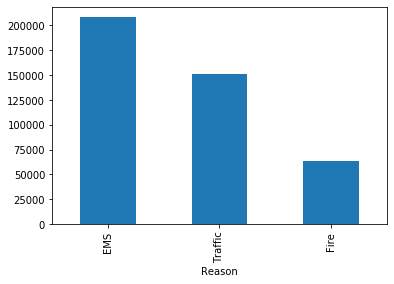

In [11]:
df['reason'].value_counts().plot(kind = 'bar')
plt.xlabel('Reason')

In [12]:
type(df['timeStamp'].iloc[1])

str

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
time = df['timeStamp'].iloc[1]
time, time.hour, time.month,time.day,time.dayofweek

(Timestamp('2015-12-10 17:29:21'), 17, 12, 10, 3)

In [14]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day'] = df['timeStamp'].apply(lambda x: x.day)
df['dayofweek'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['year'] = df['timeStamp'].apply(lambda x: x.year)

In [21]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())
df['date']= pd.to_datetime(df['date'])

In [22]:
df['date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
423904   2018-11-16
423905   2018-11-16
423906   2018-11-16
423907   2018-11-16
423908   2018-11-16
Name: date, Length: 423909, dtype: datetime64[ns]

### **Data visualization **


In [15]:
import seaborn as sb

1. Plot of number of incident reports by days of the week and categories of incidents

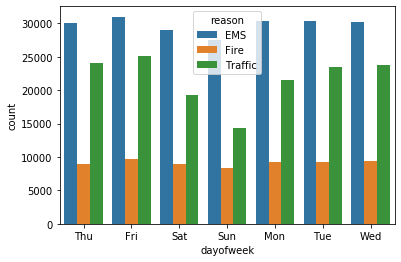

In [16]:
sb.countplot(x='dayofweek', hue ='reason',data=df)

2. Plot of number of incident reports by months and categories of incidents

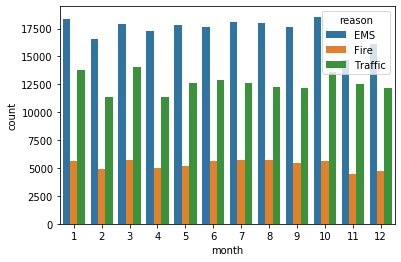

In [17]:
sb.countplot(x='month', hue ='reason',data=df)

3. Plot of number of incident reports by months, try fitting a linear model


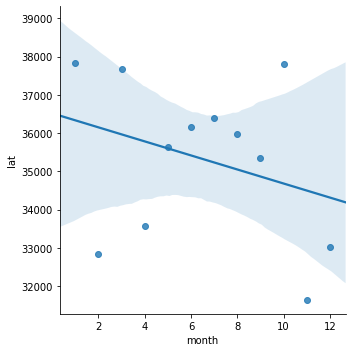

In [18]:
df_month = df.groupby(['month']).count()
df_month = df_month.reset_index()
sb.lmplot(x= 'month', y = 'lat', data = df_month)

4. Plot of # of incidents per days

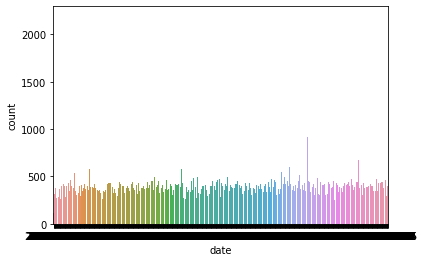

In [19]:
#1 Use seaborn
sb.countplot(x ='date', data = df)


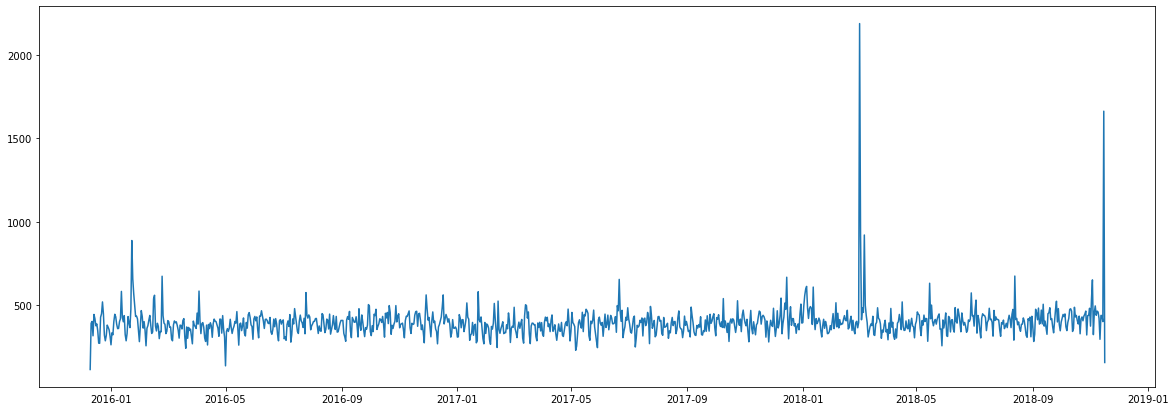

In [19]:
#2 Use plt
plt.figure(figsize=(20,7))
df_date = df.groupby(['date']).count()
df_date = df_date.reset_index()
plt.plot(df_date['date'],df_date['lat'])

5. Plot of # of incidents per day and per reason

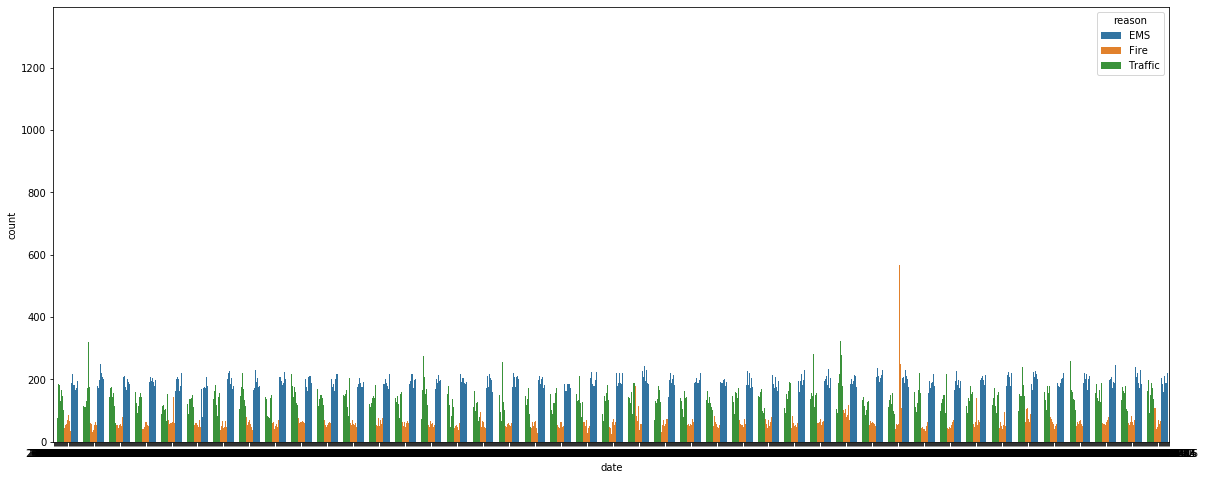

In [21]:
#1.USe seaborn
plt.figure(figsize=(20,8))
sb.countplot(x ='date', hue ='reason',data = df)

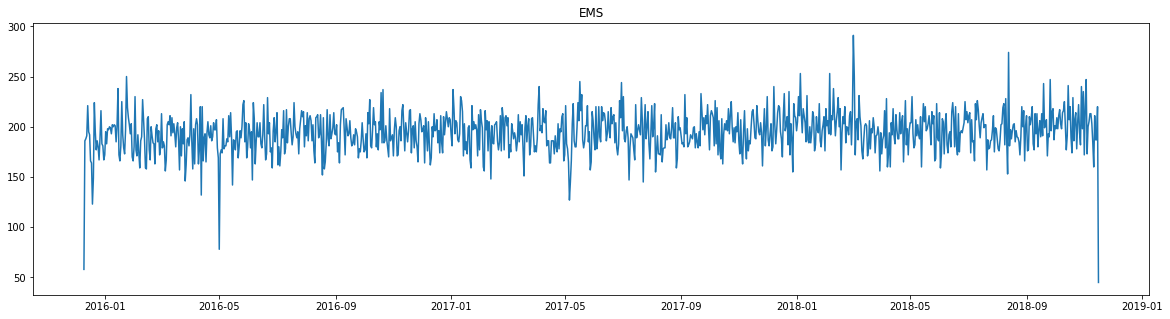

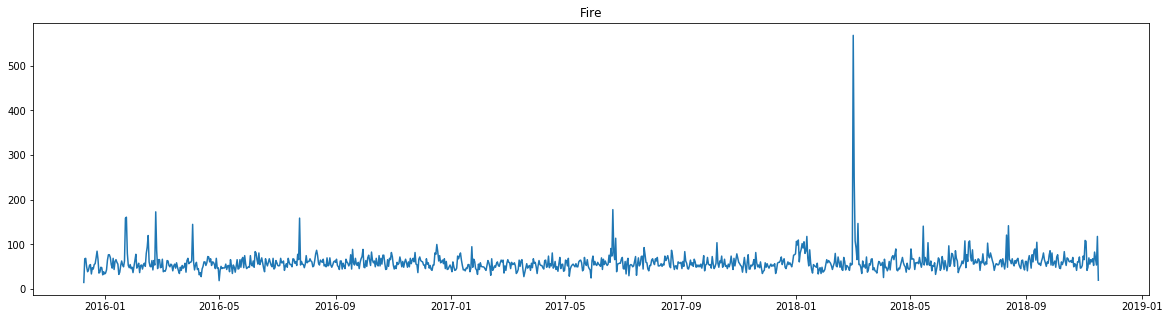

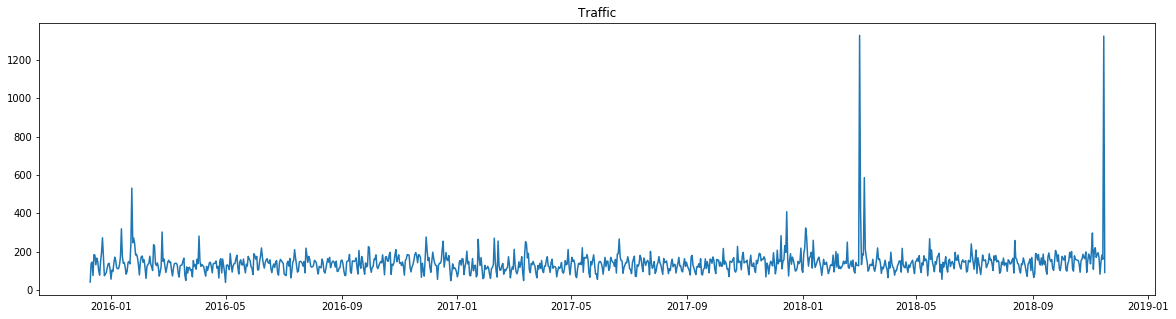

In [20]:
#2. Use plt

reason = df['reason'].unique().tolist()

for i in reason:
    plt.figure(figsize=(20,5))
    df_reason= df[df['reason'] ==i]
    df_reason_bydate = df_reason.groupby(['date']).count()
    df_reason_bydate = df_reason_bydate.reset_index()
    plt.plot(df_reason_bydate['date'],df_reason_bydate['lat'])
    plt.title(i)

6. Create a heat map and cluster map for Day vs Hour

In [23]:
#Create a new dataset for the heatmap, using unstack
df_new = df.groupby(['dayofweek','hour']).count()['lat']
df_new = df_new.unstack(level = -1)
df_new.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Mon,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Sat,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sun,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thu,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486


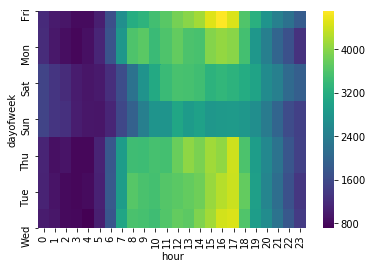

In [24]:
sb.heatmap(df_new, cmap='viridis')

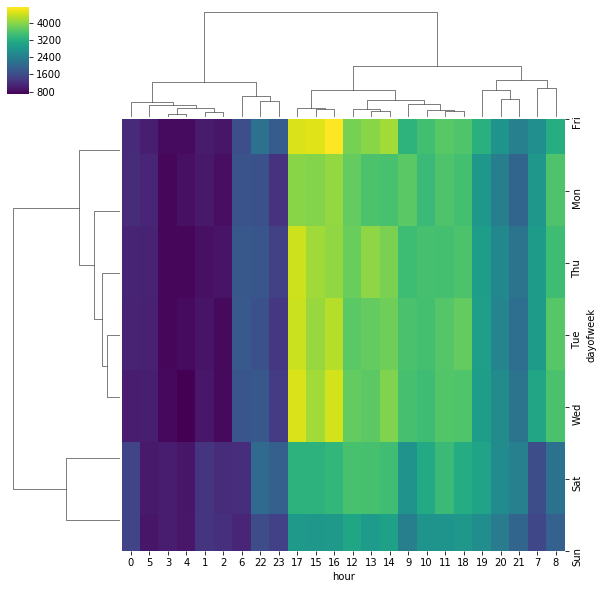

In [25]:
sb.clustermap(df_new,cmap='viridis')

7. Create a heatmap and cluster map for Month vs. Day

In [26]:
df_monthday = df.groupby(['month','dayofweek']).count()['lat'].unstack(level = -1)
df_monthday

dayofweek,Fri,Mon,Sat,Sun,Thu,Tue,Wed
month,,,,,,,
1,5532,5716,5103,4882,4985,6118,5488
2,4848,5214,4431,3806,4708,4755,5066
3,7344,4663,4914,3569,6010,5090,6076
4,5195,5154,4947,4628,4637,4413,4609
5,4989,5019,4275,3940,5469,6203,5749
6,5867,5045,4868,4019,5951,5013,5408
7,5380,5792,4883,5114,4954,5488,4794
8,5312,5212,4355,3963,5328,5690,6112
9,6010,4675,5023,4245,5300,4930,5156


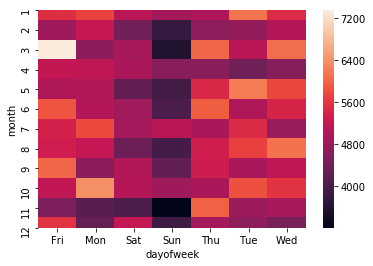

In [27]:
sb.heatmap(df_monthday)

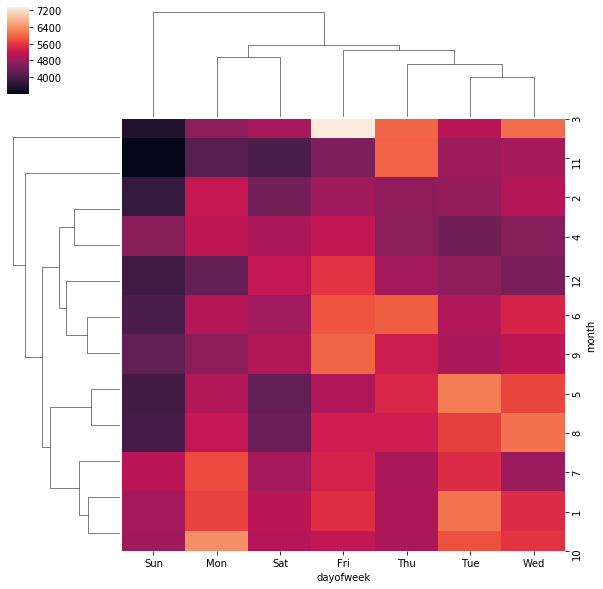

In [28]:
sb.clustermap(df_monthday)

In [23]:
newfile = '\\911_new.csv'
df.to_csv(cwd+newfile)